In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data_60_fps.csv
clean_data_60 = pd.read_csv('data_60_fps.csv')
clean_data_60.head()

,t,z,theta,dz,dtheta,ddz,ddtheta,x_64,y_64
0,0.0000,0.500000,0.785398,0.000000,0.000000,6.936718,-13.873435,54.627417,41.372583
1,0.0165,0.500971,0.783456,0.114043,-0.228077,6.859709,-13.715785,54.627289,41.284650
2,0.0330,0.503806,0.777787,0.225633,-0.451126,6.635088,-13.259341,54.625472,41.027449
3,0.0500,0.508612,0.768178,0.335475,-0.670761,6.250480,-12.516790,54.617414,40.589899
4,0.0665,0.515002,0.755395,0.434649,-0.870109,5.731296,-11.590464,54.596699,40.004976


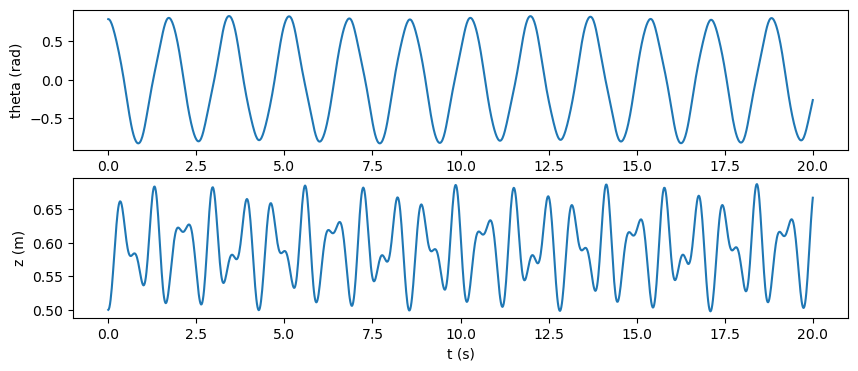

In [3]:
# plot theta and z against t (in seconds), in two subplots 2 rows, 1 column
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(clean_data_60['t'], clean_data_60['theta'])
plt.ylabel('theta (rad)')
plt.subplot(2, 1, 2)
plt.plot(clean_data_60['t'], clean_data_60['z'])
plt.ylabel('z (m)')
plt.xlabel('t (s)')
plt.show()

In [4]:
# known data being z and theta
known_data = clean_data_60[['t', 'z', 'theta']]
known_data.head()

,t,z,theta
0,0.0000,0.500000,0.785398
1,0.0165,0.500971,0.783456
2,0.0330,0.503806,0.777787
3,0.0500,0.508612,0.768178
4,0.0665,0.515002,0.755395


In [5]:
# disable pandas warning
pd.options.mode.chained_assignment = None

In [6]:
# infer dt
known_data['dt'] = known_data['t'].diff()
# infer dz and dtheta from z and theta
known_data['dz'] = known_data['z'].diff()
known_data['dtheta'] = known_data['theta'].diff()
# infer ddz and ddtheta from dz and dtheta
known_data['ddz'] = known_data['dz'].diff()
known_data['ddtheta'] = known_data['dtheta'].diff()
known_data.head()

,t,z,theta,dt,dz,dtheta,ddz,ddtheta
0,0.0000,0.500000,0.785398,NaN,NaN,NaN,NaN,NaN
1,0.0165,0.500971,0.783456,0.0165,0.000971,-0.001942,NaN,NaN
2,0.0330,0.503806,0.777787,0.0165,0.002835,-0.005669,0.001864,-0.003727
3,0.0500,0.508612,0.768178,0.0170,0.004806,-0.009609,0.001971,-0.003939
4,0.0665,0.515002,0.755395,0.0165,0.006390,-0.012783,0.001584,-0.003174
